# Visualization of distance prediction models

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from labellines import labelLine, labelLines

scores = {}
with open("/root/path-length-approximation-deep-learning/outputs/scores_19.08.2021 - 01:36:57.pickle", "rb") as f:
    scores = pickle.load(f)

## Distance-Wise Accuracy of NN

In [2]:
def plot_dist_wise_acc(split):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Accuracy and Distance Count - {}'.format(split))
    ax1 = plt.subplot(2,1,1)
    plt.title('distance-wise accuracy')
    plt.xlabel('distance values')
    plt.ylabel('accuracy')
    width = 0.95
    n_emb_dims = len(list(scores["fb-pages-food"].keys()))
    for i, (emb_dim, split_dict) in enumerate(scores["fb-pages-food"].items()):
        dist_accuracies = split_dict[split]["nn"]["dist_accuracies"]
        
        bar_offset = width/2 - width/n_emb_dims * i
        plt.bar(np.array(range(len(dist_accuracies))) - bar_offset, dist_accuracies, width/n_emb_dims, align='center', label="{}".format(emb_dim))
        """
        for index, value in enumerate(dist_accuracies):
            plt.text(index+0.03, value, str(np.round(value, 2))+'%')
        """
    plt.legend()
    ax1.set_xticks(range(len(dist_accuracies)))
    
    dist_counts = scores["fb-pages-food"][16][split]["nn"]["dist_counts"]
    ax2 = plt.subplot(2,1,2)
    plt.bar(range(len(dist_accuracies)), dist_counts, width, align='center')
    for index, value in enumerate(dist_counts):
        plt.text(index-0.2, value+300, str(value))
    plt.title('distance-wise count')
    plt.xlabel('distance values')
    plt.ylabel('counts')
    ax2.set_xticks(range(len(dist_accuracies)))
    ax2.set_xbound(ax1.get_xbound())
    fig.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

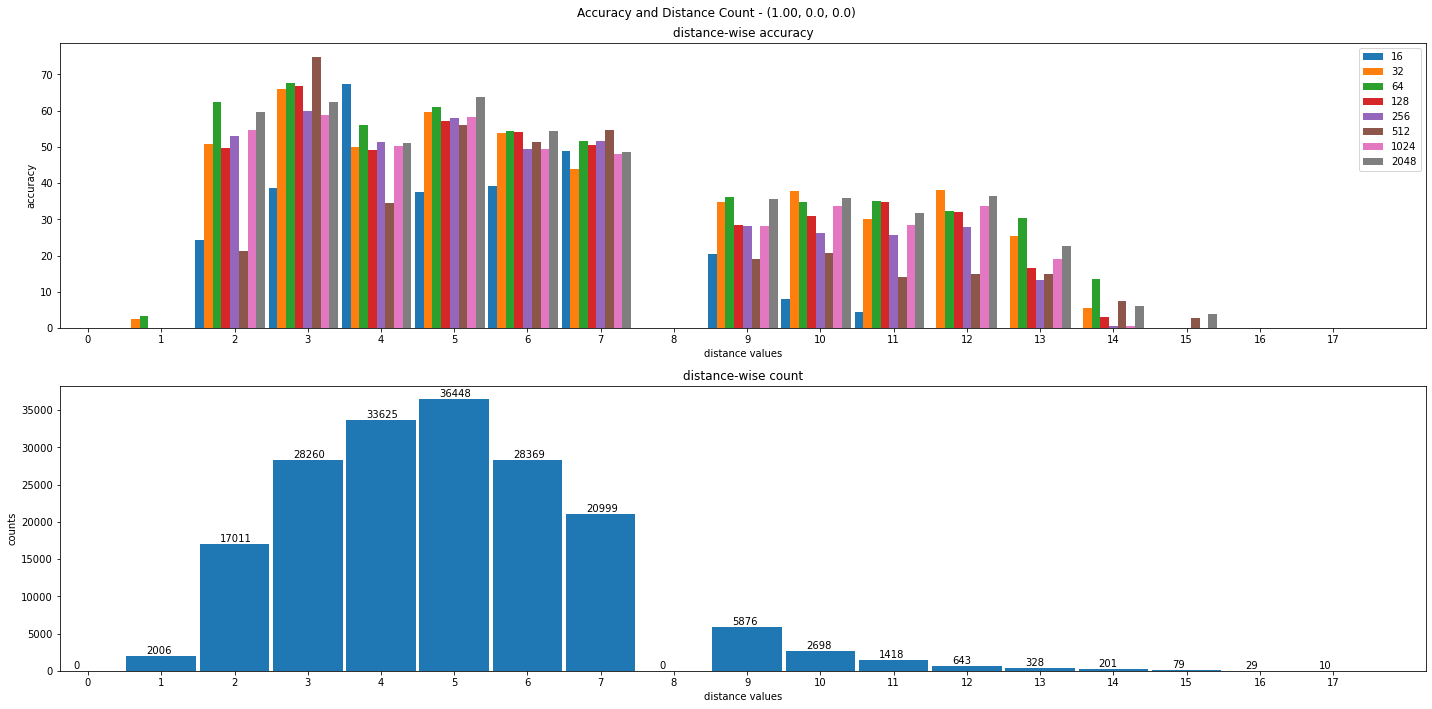

In [3]:
plot_dist_wise_acc("(1.00, 0.0, 0.0)")

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

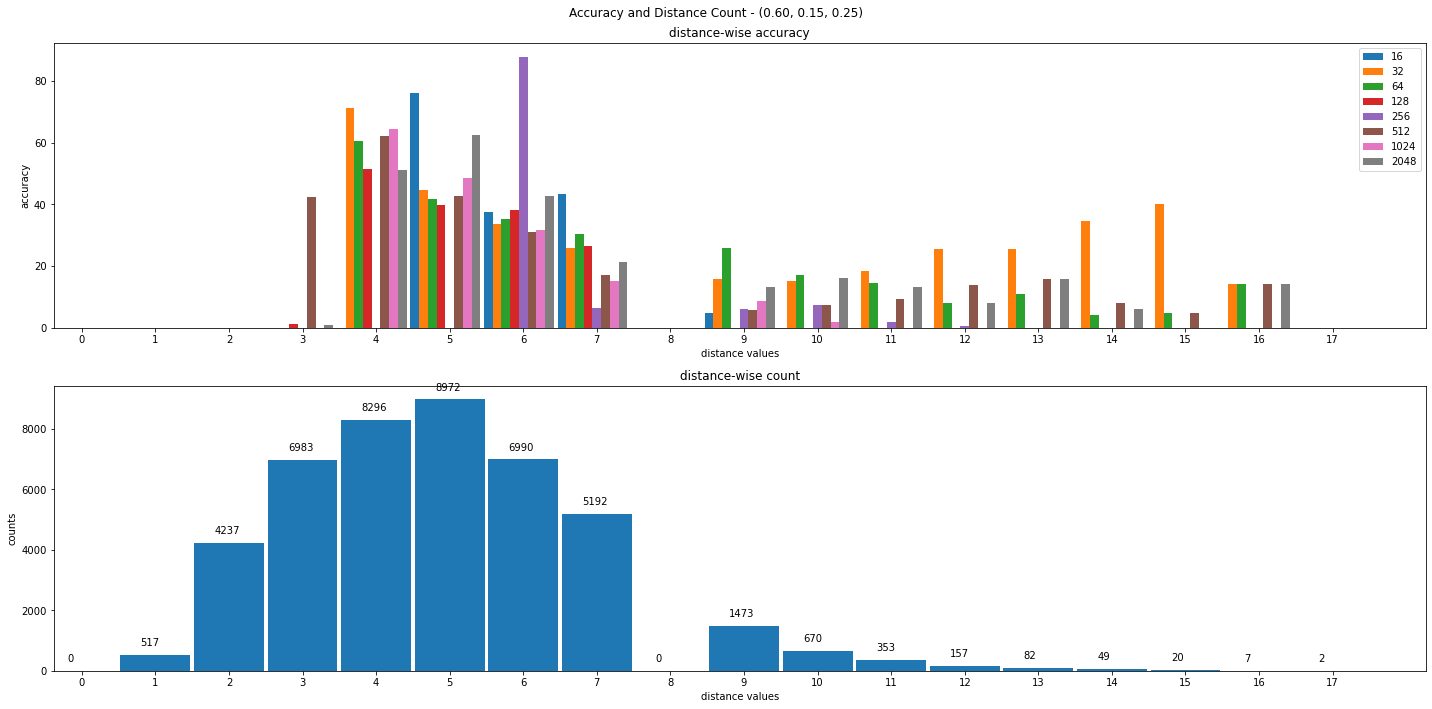

In [4]:
plot_dist_wise_acc("(0.60, 0.15, 0.25)")

## Embedding Dimension vs Accuracy of NN and Linear Regression

In [5]:
def plot_emb_dim_accs(split):
    emb_dims = []
    emb_dims_accs = []
    emb_dims_accs_baseline = []
    for emb_dim, split_dict in scores["fb-pages-food"].items():
        score_dict = split_dict[split]
        emb_dims.append(str(emb_dim))
        emb_dims_accs.append(score_dict["nn"]["acc"])
        emb_dims_accs_baseline.append(score_dict["baseline"]["acc"]/100)

    plt.figure(figsize=(20, 10))
    plt.title('Embedding Dimension vs. Accuracy - {}'.format(split))
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Accuracy')
    plt.plot(emb_dims, emb_dims_accs_baseline, label="linear regression")
    plt.plot(emb_dims, emb_dims_accs, label="neural net")
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

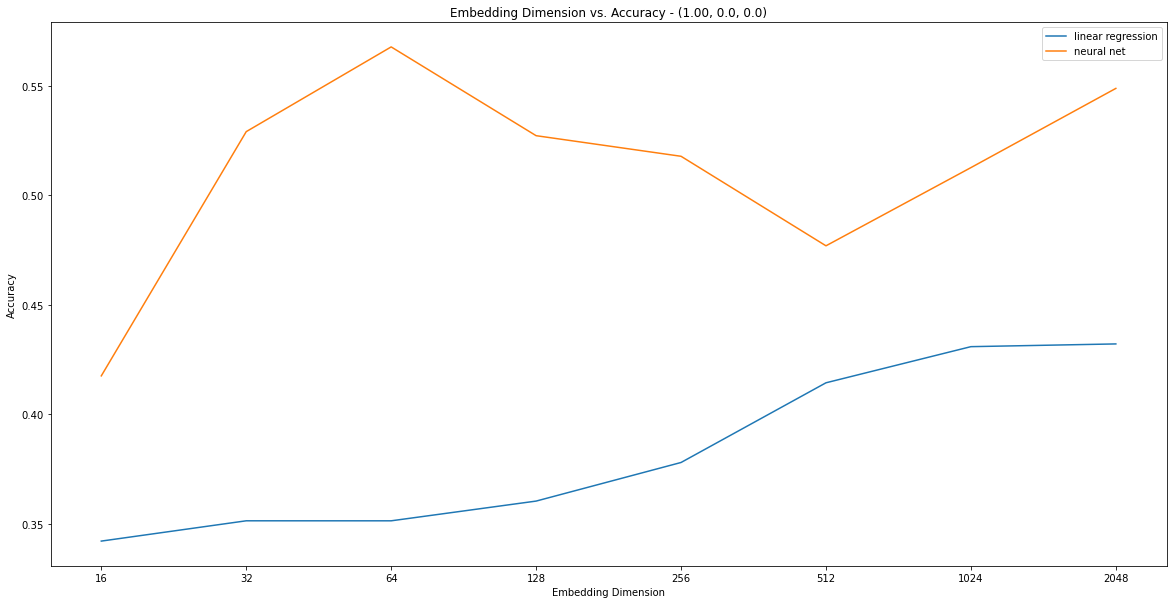

In [6]:
plot_emb_dim_accs("(1.00, 0.0, 0.0)")

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

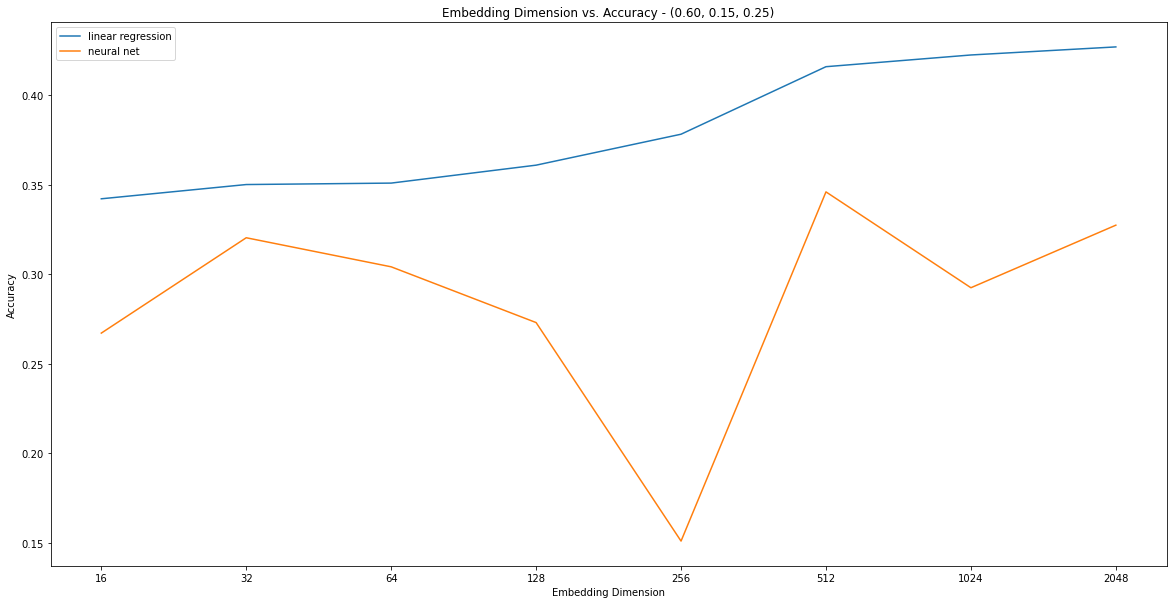

In [7]:
plot_emb_dim_accs("(0.60, 0.15, 0.25)")

## Validation and Training Loss over all Training Epochs

In [8]:
def plot_losses(split, emb_dim_exception_list=[]):
    plt.figure(figsize=(20, 20))
    plt.title('Training Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    for emb_dim, split_dict in scores["fb-pages-food"].items():
        if emb_dim in emb_dim_exception_list:
            continue
        train_losses = split_dict[split]["nn"]["train_losses"]
        val_losses = split_dict[split]["nn"]["val_losses"]
        plt.plot(range(1, len(train_losses)+1), train_losses, label="train - emb {}".format(emb_dim))
        plt.plot(range(1, len(val_losses)+1), val_losses, label="val - emb {}".format(emb_dim))
    labelLines(plt.gca().get_lines(), align=False, fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

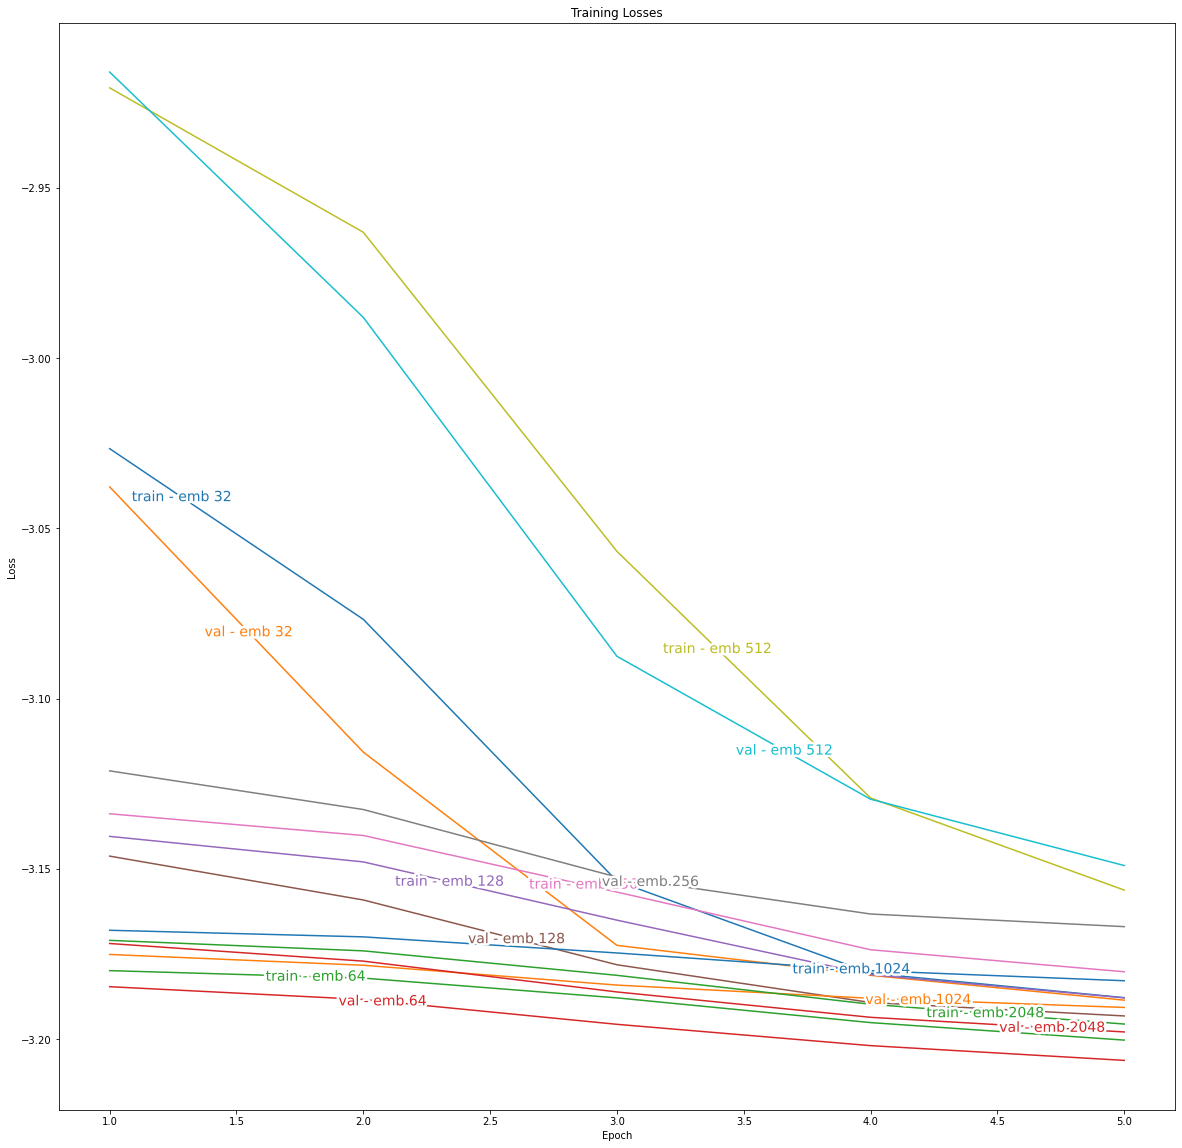

In [9]:
plot_losses("(1.00, 0.0, 0.0)", emb_dim_exception_list=[16])

<module 'matplotlib.pyplot' from '/root/anaconda3/envs/system-failed-ml/lib/python3.7/site-packages/matplotlib/pyplot.py'>

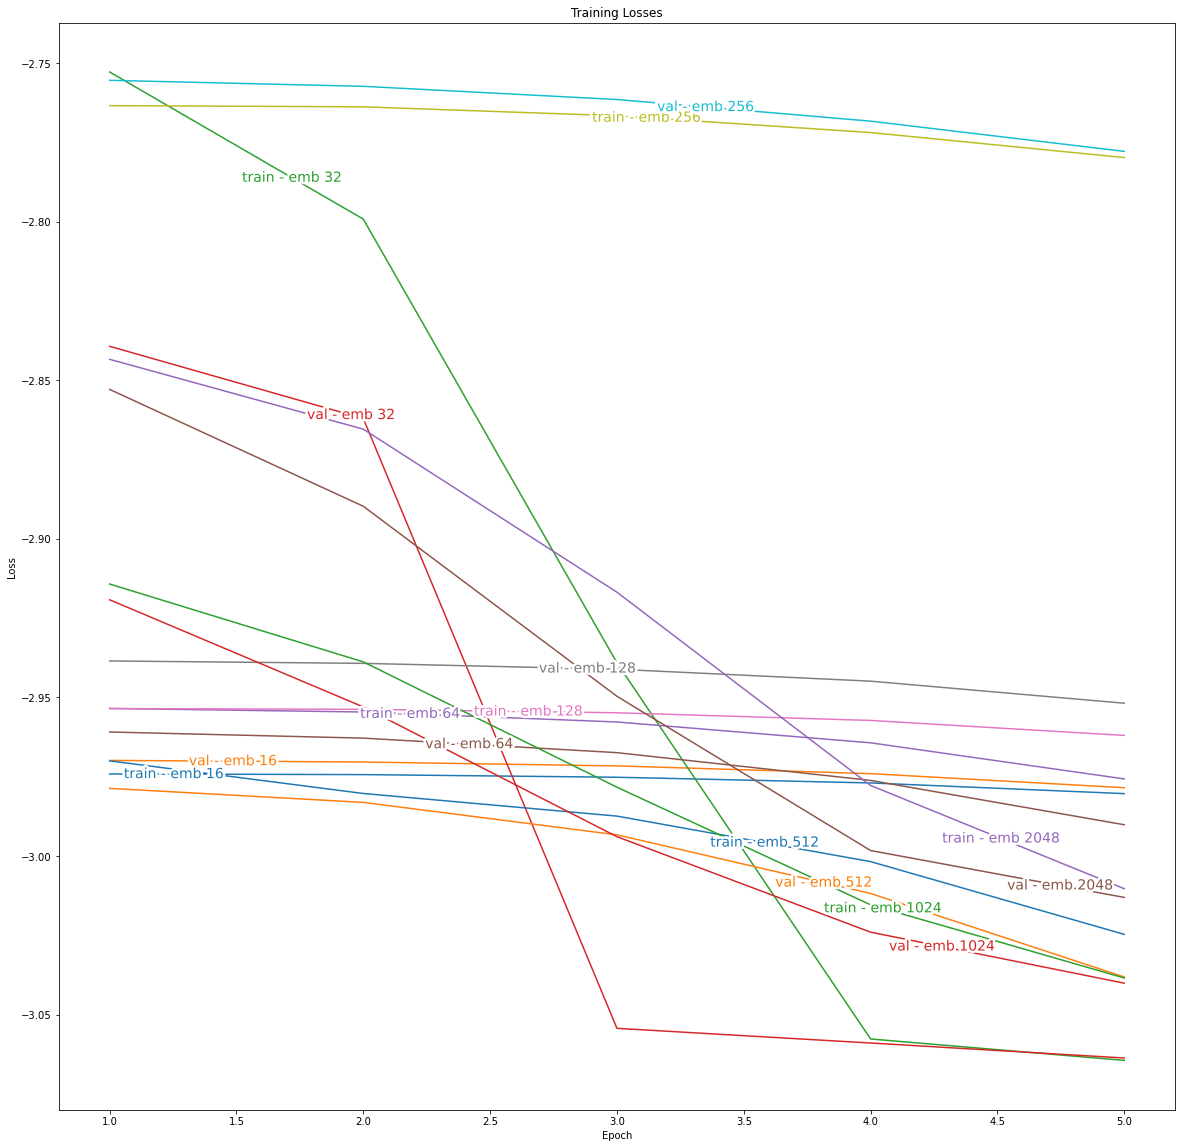

In [10]:
plot_losses("(0.60, 0.15, 0.25)")

# Experimental

### random experiments not of concern

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(score["lr_arr"], score["lr_losses"])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('LR range plot')
plt.xlabel('Learning rates')
plt.ylabel('Losses')
plt.show()

NameError: name 'score' is not defined

<Figure size 1440x720 with 0 Axes>